In [1]:
# paraPropPython example use of paraPropPython.py notebook
# s. prohira, c. sbrocco

%matplotlib inline
import paraPropPython as ppp
import numpy as np
import matplotlib.pyplot as plt
import util as util

In [2]:
##### steady state example #####

### first, initialize an instance of paraProp by defining its dimensions and frequency of interest ###
iceDepth = 200. # m
iceLength = 600. # m
dx = 1 # m
dz = 0.05 # m

freq = 0.15

### it is useful to set the reference depth as the source depth when you only have one transmitter ###
sourceDepth = 50. # m
sim = ppp.paraProp(iceLength, iceDepth, dx, dz, refDepth=sourceDepth)

### useful arrays for plottinng ###
z = sim.get_z()
x = sim.get_x()

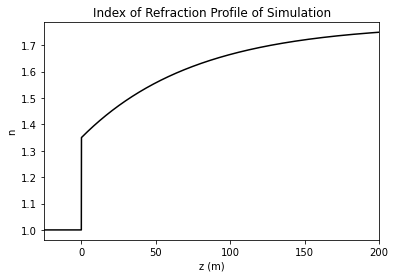

In [3]:
### NOTE: define n before defining source ###

### an example of defining n as a function of z (also can be done using a vector, see implementation) ###
def southpole(z):
    A=1.78
    B=-0.43
    C=-0.0132
    return A+B*np.exp(C*z)
sim.set_n(nFunc=southpole)

### plot ###
plt.plot(z, sim.get_n()[:,0], color='black')
plt.ylabel('n')
plt.xlabel('z (m)')
plt.title('Index of Refraction Profile of Simulation')
plt.xlim(z[0], z[-1])

plt.show()

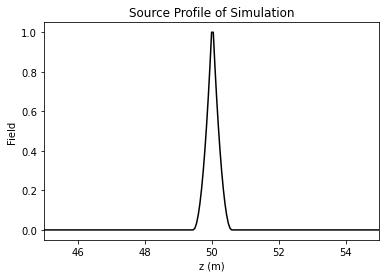

In [4]:
### an example of defining the source as a dipole ###
### (also can be done using a vector or function like n, see implementation) ###
sim.set_dipole_source_profile(freq, sourceDepth)

### plot, zoomed in ###
plt.plot(z, abs(sim.get_source_profile()), color='black')
plt.ylabel('Field')
plt.xlabel('z (m)')
plt.title('Source Profile of Simulation')
plt.xlim(sourceDepth - 5, sourceDepth + 5)
plt.show()


### set a cw signal ###
sim.set_cw_source_signal(freq)

In [5]:
### run the solver ###
sim.do_solver()

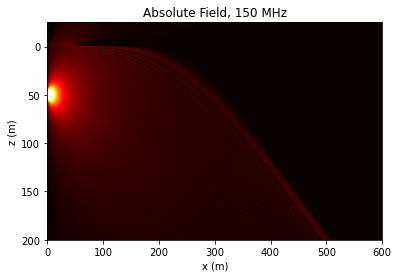

In [6]:
### plot absolute value of field for whole simulation space ###
fig = plt.figure()
ax = fig.add_subplot(111)

plt.imshow(np.transpose(abs(sim.get_field())), aspect='auto', cmap='hot',  vmin=1e-5, vmax=1e-2, 
          extent=(x[0], x[-1], z[-1], z[0]))
plt.title("Absolute Field, " + str(int(freq*1000))+" MHz")
plt.xlabel("x (m)")
plt.ylabel("z (m)")
plt.show()

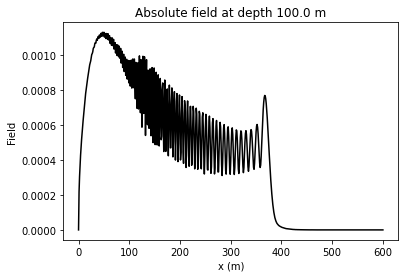

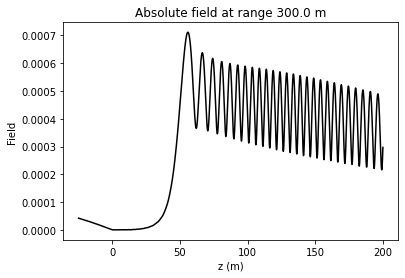

Absolute field at point (x0 = 300.0, z0 = 100.0): 0.0003938706162343914


In [7]:
### plot absolute value of field for horizontal slice of simulation ###
z0 = 100.
plt.plot(x, abs(sim.get_field(z0=z0)), color='black')
plt.xlabel('x (m)')
plt.ylabel('Field')
plt.title("Absolute field at depth " + str(z0) + " m" )
plt.show()

### plot absolute value of field for vertical slice of simulation ###
x0 = 300.
plt.plot(z, abs(sim.get_field(x0=x0)), color='black')
plt.xlabel('z (m)')
plt.ylabel('Field')
plt.title("Absolute field at range " + str(x0) + " m" )
plt.show()

### value of field for at a single point (x0, z0) ###
print("Absolute field at point (x0 = " + str(x0) + ", z0 = " + str(z0) + "): " + str(abs(sim.get_field(x0=x0, z0=z0))))